# Keras Notebook

This notebook allows us to train detector data using a CNN model using binary classsification. The purpose of this model is to distinguish between ZvvHbb images and JZ0W images. 

In order to do this we must first convert our data into a convenient format that allows us to load it into a CNN using the Keras API. Then it is a matter of using a convenient CNN model to classify the images.

In [72]:
import numpy as np
import pandas as pd 
import h5py
import convert_data

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize, LogNorm

from sklearn.utils import shuffle

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
np.random.seed(7)

In [73]:
#This loads all of our data and gives us our images and labels in the format we need
images, labels = convert_data.images_and_labels()

x_tr, x_val, y_tr, y_val = train_test_split(images, labels, test_size=0.5, random_state=42)
x_val, x_te, y_val, y_te = train_test_split(x_val, y_val, test_size=0.1, random_state=42)

# Model Creation

Here is actually where we define our model

In [84]:
def inital_model():
    """
        This is the initial design of our CNN. 
        It comes from other examples not specific to this dataset but performs pretty well given its generality
    """
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(26,32,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

reduce_lr = LearningRateScheduler(lambda x: 1e-2 * 0.7 ** x)

batch_size = 16
epochs = 50

In [85]:
model = inital_model()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 32, 32)        320       
_________________________________________________________________
batch_normalization_55 (Batc (None, 26, 32, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 26, 32, 32)        9248      
_________________________________________________________________
batch_normalization_56 (Batc (None, 26, 32, 32)        128       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 16, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 13, 16, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 16, 64)        18496     
__________

In [86]:
history = model.fit(x_tr, y_tr, validation_data = (x_val, y_val) ,epochs = epochs, verbose=2, callbacks = [reduce_lr], batch_size = batch_size)

Train on 1000 samples, validate on 900 samples
Epoch 1/50
 - 22s - loss: 1.2432 - acc: 0.6670 - val_loss: 5.0503 - val_acc: 0.5067
Epoch 2/50
 - 13s - loss: 0.7185 - acc: 0.7210 - val_loss: 0.7902 - val_acc: 0.5644
Epoch 3/50
 - 13s - loss: 0.6496 - acc: 0.7360 - val_loss: 0.4902 - val_acc: 0.7900
Epoch 4/50
 - 13s - loss: 0.4690 - acc: 0.8050 - val_loss: 0.4696 - val_acc: 0.8033
Epoch 5/50
 - 13s - loss: 0.4547 - acc: 0.8030 - val_loss: 0.4732 - val_acc: 0.7989
Epoch 6/50
 - 13s - loss: 0.3356 - acc: 0.8500 - val_loss: 0.6989 - val_acc: 0.7400
Epoch 7/50
 - 13s - loss: 0.3280 - acc: 0.8610 - val_loss: 0.7536 - val_acc: 0.7500
Epoch 8/50
 - 13s - loss: 0.2735 - acc: 0.8930 - val_loss: 0.5207 - val_acc: 0.7856
Epoch 9/50
 - 13s - loss: 0.2544 - acc: 0.8950 - val_loss: 0.5377 - val_acc: 0.7967
Epoch 10/50
 - 13s - loss: 0.2679 - acc: 0.8950 - val_loss: 0.6512 - val_acc: 0.7744
Epoch 11/50
 - 13s - loss: 0.2441 - acc: 0.9060 - val_loss: 0.6006 - val_acc: 0.7944
Epoch 12/50
 - 13s - loss: 

In [87]:
scores = model.evaluate(x_te, y_te, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 10.00%


In [88]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss', 'lr']


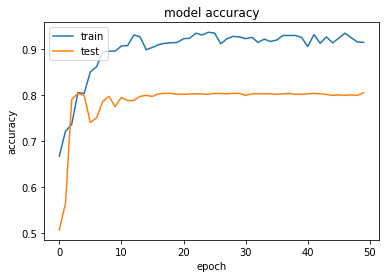

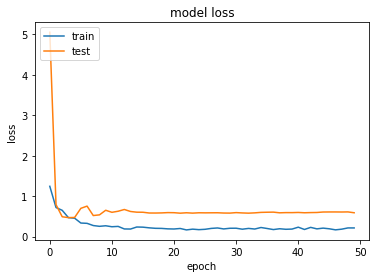

In [89]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [135]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(x_te).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_te, y_pred_keras)

In [136]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

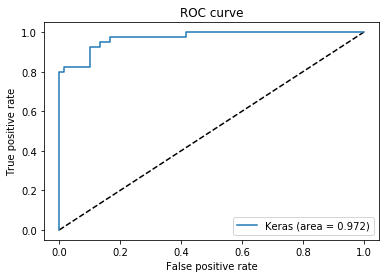

In [137]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Conclusion

We are able to get fairly good accuracy for this model. However, it takes a long time because it has a lot of parameters. Furthermore, it is overfitting as can be seen from the diverging validation accuracy and Baseline error.


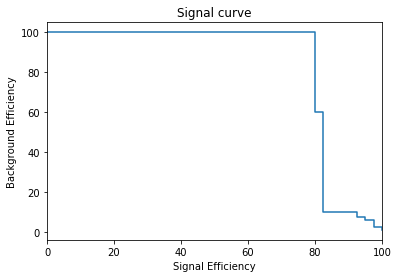

In [139]:
plt.figure(1)
for i, val in enumerate(fpr_keras):
    if val == 0:
        fpr_keras[i] = 0.01
        
plt.plot(100*tpr_keras, 1.0/fpr_keras)
plt.xlabel('Signal Efficiency')
plt.ylabel('Background Efficiency')
plt.xlim(0, 100)
plt.title('Signal curve')
plt.show()